In [1]:
import pandas as pd
import numpy as np
import requests
import json
from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [26]:
#You have to use your API key to access the data!

MY_API_KEY = "jwXHlrnwO1ThtW84vByrO-KE5AMLYobn6ZLsZp5fNQSUuFaHtrK6mVlTI2Qte7HMqb045-I1415PkJwGsaVwgkwhxywzDn48rhJ5etSwP8jywxjPGXOKuckxtaYyX3Yx"


term = 'restaurant'
location = 'Brooklyn'
SEARCH_LIMIT = 100

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text)

<Response [400]>
<class 'str'>
{"error": {"code": "VALIDATION_ERROR", "description": "100 is greater than the maximum of 50", "field": "limit", "instance": 100}}


In [3]:
restos = json.loads(response.text)
print(restos.keys())

dict_keys(['businesses', 'total', 'region'])


In [14]:
resto_db = pd.DataFrame.from_dict(restos["businesses"])
resto_db

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,Ms3CAGddVbgetiQrpzqxPQ,hometown-bar-b-que-brooklyn-3,Hometown Bar-B-Que,https://s3-media2.fl.yelpcdn.com/bphoto/er94hg...,False,https://www.yelp.com/biz/hometown-bar-b-que-br...,1370,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,"{'latitude': 40.6748965703426, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '454 Van Brunt St', 'address2': '...",+13472944644,(347) 294-4644,6937.985342
1,nOjGNqPcu5jHRRElOndQqQ,red-hook-lobster-pound-brooklyn,Red Hook Lobster Pound,https://s3-media3.fl.yelpcdn.com/bphoto/xI2_dA...,False,https://www.yelp.com/biz/red-hook-lobster-poun...,1099,"[{'alias': 'seafood', 'title': 'Seafood'}]",4.0,"{'latitude': 40.6797687107191, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '284 Van Brunt St', 'address2': '...",+17188587650,(718) 858-7650,6721.368118
2,4yPqqJDJOQX69gC66YUDkA,peter-luger-brooklyn-2,Peter Luger,https://s3-media4.fl.yelpcdn.com/bphoto/KRpKd1...,False,https://www.yelp.com/biz/peter-luger-brooklyn-...,5758,"[{'alias': 'steak', 'title': 'Steakhouses'}]",4.0,"{'latitude': 40.709945, 'longitude': -73.962478}",[],$$$$,"{'address1': '178 Broadway', 'address2': '', '...",+17183877400,(718) 387-7400,6696.460095
3,GA5msU6NO9rQRctPfDJCBg,peaches-hothouse-brooklyn,Peaches HotHouse,https://s3-media3.fl.yelpcdn.com/bphoto/FSuRqP...,False,https://www.yelp.com/biz/peaches-hothouse-broo...,1184,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.0,"{'latitude': 40.6833699737169, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '415 Tompkins Ave', 'address2': '...",+17184839111,(718) 483-9111,3471.525420
4,0U9uW93o9DUnAP7r-76LVg,haenyeo-brooklyn,Haenyeo,https://s3-media4.fl.yelpcdn.com/bphoto/u9DGNM...,False,https://www.yelp.com/biz/haenyeo-brooklyn?adju...,125,"[{'alias': 'korean', 'title': 'Korean'}]",4.0,"{'latitude': 40.67519, 'longitude': -73.98116}","[pickup, delivery]",NaN,"{'address1': '239 5th Ave', 'address2': '', 'a...",+17182132290,(718) 213-2290,4342.299748
5,0czWwSVOVjVQaefbL4Zq-g,kokomo-brooklyn-2,Kokomo,https://s3-media1.fl.yelpcdn.com/bphoto/XXon2G...,False,https://www.yelp.com/biz/kokomo-brooklyn-2?adj...,26,"[{'alias': 'caribbean', 'title': 'Caribbean'}]",4.0,"{'latitude': 40.721985, 'longitude': -73.959706}",[],NaN,"{'address1': '65 Kent Ave', 'address2': None, ...",+13477991312,(347) 799-1312,7932.466874
6,34LM8_lP8iwizHBu6YgaQQ,el-jeffe-brooklyn,El Jeffe,https://s3-media4.fl.yelpcdn.com/bphoto/hJlnef...,False,https://www.yelp.com/biz/el-jeffe-brooklyn?adj...,251,"[{'alias': 'newmexican', 'title': 'New Mexican...",4.5,"{'latitude': 40.6801601, 'longitude': -73.9419...","[pickup, delivery]",$$,"{'address1': '1483 Fulton St', 'address2': '',...",+13473658919,(347) 365-8919,3102.387731
7,m4CFfE1_u5rwVgb45ZqRpA,sofreh-brooklyn,Sofreh,https://s3-media2.fl.yelpcdn.com/bphoto/VXvFtW...,False,https://www.yelp.com/biz/sofreh-brooklyn?adjus...,238,"[{'alias': 'persian', 'title': 'Persian/Irania...",4.0,"{'latitude': 40.6798617, 'longitude': -73.973984}",[],$$,"{'address1': '75 St Marks Ave', 'address2': ''...",+16463400322,(646) 340-0322,4230.766853
8,oOsJn3leUnWDfErRWMf81g,soco-brooklyn,Soco,https://s3-media3.fl.yelpcdn.com/bphoto/MQqWdJ...,False,https://www.yelp.com/biz/soco-brooklyn?adjust_...,2147,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...",4.0,"{'latitude': 40.693866, 'longitude': -73.964535}","[pickup, delivery]",$$,"{'address1': '509 Myrtle Ave', 'address2': '',...",+17187831936,(718) 783-1936,5083.137850
9,BsdB6DhfvSq7ZZs-_u0RpA,tacis-beyti-brooklyn,Taci's Beyti,https://s3-media4.fl.yelpcdn.com/bphoto/EiPHN9...,False,https://www.yelp.com/biz/tacis-beyti-brooklyn?...,723,"[{'alias': 'turkish', 'title': 'Turkish'}, {'a...",4.5,"{'latitude': 40.60956, 'longitude': -73.96209}","[pickup, delivery]",$$,"{'address1': '1953 Coney Island Ave', 'address...",+17186275750,(718) 627-5750,5119.863353


In [5]:
bins = [0,200,400,600,800,resto_db.review_count.max()]
resto_binned = resto_db.groupby(pd.cut(resto_db.review_count,bins))["rating"].mean()
#resto_db.groupby("rating")["review_count"].mean()
print(resto_binned)

review_count
(0, 200]       4.388889
(200, 400]     4.318182
(400, 600]     3.666667
(600, 800]     4.000000
(800, 5758]    4.000000
Name: rating, dtype: float64


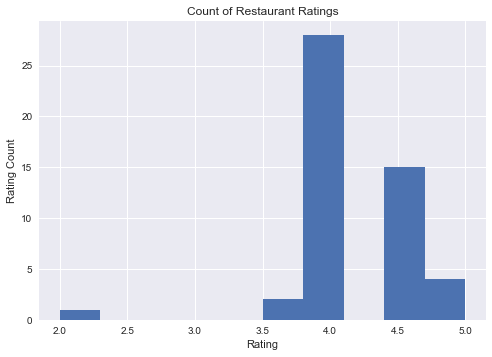

In [24]:
fig, ax = plt.subplots()
#list(rest)
ax.set_title("Count of Restaurant Ratings")
ax.set_xlabel("Rating")
ax.set_ylabel("Rating Count")
ax.hist(resto_db["rating"])
plt.savefig("Restaurant Ratings")
#ax.set_xticks(bins[:-1])
#ax.bar(list(map(lambda x:str,bins[:-1])),resto_binned)

In [7]:
print(resto_binned.size)

5
